<a href="https://colab.research.google.com/github/harshithap99/open-lab/blob/master/final_Inceptionmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transfer-learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import glob
import os

Using TensorFlow backend.


In [ ]:
img=glob.glob(("/content/drive/My Drive/Colab Notebooks/LabelledRice/Labelled/*"))
for i in img:
    print(i)

/content/drive/My Drive/Colab Notebooks/LabelledRice/Labelled/Hispa
/content/drive/My Drive/Colab Notebooks/LabelledRice/Labelled/BrownSpot
/content/drive/My Drive/Colab Notebooks/LabelledRice/Labelled/LeafBlast
/content/drive/My Drive/Colab Notebooks/LabelledRice/Labelled/Healthy


In [ ]:

from sklearn.datasets import load_files
import numpy as np

dir = '/content/drive/My Drive/Colab Notebooks/LabelledRice/Labelled'


def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x, y,target_labels = load_dataset(dir)

#x_test, y_test,_ = load_dataset(test_dir)

print('Loading complete!')

print('Training set size : ' , x.shape[0])


  

Loading complete!
Training set size :  3357


In [ ]:
no_of_classes = len(np.unique(y))
no_of_classes

4

In [ ]:
print(y[0:10])

[3 1 3 1 1 0 1 1 1 1]


In [ ]:
from keras.utils import np_utils
y= np_utils.to_categorical(y,no_of_classes)
y[0] 

array([0., 0., 0., 1.], dtype=float32)

In [ ]:
#dividing the entire dataset into training data and validation data
from sklearn.model_selection import  train_test_split
X_train,x_val,Y_train,y_val = train_test_split(x,y,test_size=0.18,random_state=42)
#dividing the training dataset into training and testing
X_train,x_test,Y_train,y_test = train_test_split(X_train,Y_train,test_size=0.22,random_state=42)
X_train.shape,Y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape
# sum should result in total
print(len(X_train))
print(len(x_val))
print(len(x_test))
print(X_train[0])
print(Y_train[0])
print(x_test[0])
print(y_test[0])

2146
605
606
/content/drive/My Drive/Colab Notebooks/LabelledRice/Labelled/LeafBlast/IMG_20190419_131935.jpg
[0. 0. 0. 1.]
/content/drive/My Drive/Colab Notebooks/LabelledRice/Labelled/Healthy/IMG_20190419_141450.jpg
[0. 1. 0. 0.]


In [ ]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np
import cv2
default_image_size=tuple((150,150))
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
         # Convert to Numpy Array
        image=cv2.imread(file)
        if image is not None :
          image=cv2.resize(image, default_image_size) 
          images_as_array.append(img_to_array(image))
    return images_as_array

X_train = np.array(convert_image_to_array(X_train))
print('Training set shape : ',X_train.shape)

x_val = np.array(convert_image_to_array(x_val))
print('Validation set shape : ',x_val.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',X_train[0].shape)

Training set shape :  (2146, 150, 150, 3)
Validation set shape :  (605, 150, 150, 3)
Test set shape :  (606, 150, 150, 3)
1st training image shape  (150, 150, 3)


In [ ]:
print('1st training image as array',X_train[0]) 

1st training image as array [[[255. 235. 229.]
  [255. 232. 227.]
  [255. 235. 228.]
  ...
  [255. 228. 227.]
  [254. 231. 229.]
  [255. 225. 224.]]

 [[255. 239. 233.]
  [255. 238. 232.]
  [255. 240. 234.]
  ...
  [255. 234. 233.]
  [255. 228. 227.]
  [254. 229. 229.]]

 [[255. 230. 224.]
  [255. 242. 236.]
  [255. 234. 228.]
  ...
  [255. 226. 225.]
  [255. 231. 225.]
  [254. 226. 220.]]

 ...

 [[255. 231. 225.]
  [255. 233. 227.]
  [255. 226. 221.]
  ...
  [255. 221. 218.]
  [255. 224. 222.]
  [254. 223. 221.]]

 [[255. 234. 229.]
  [255. 222. 216.]
  [255. 231. 225.]
  ...
  [255. 218. 216.]
  [255. 225. 223.]
  [255. 229. 228.]]

 [[255. 229. 224.]
  [255. 228. 223.]
  [255. 230. 224.]
  ...
  [255. 221. 218.]
  [254. 222. 220.]
  [255. 218. 215.]]]


In [ ]:
# time to re-scale so that all the pixel values lie within 0 to 1
X_train = X_train.astype('float32')/255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32')/255
X_train[0]

array([[[1.        , 0.92156863, 0.8980392 ],
        [1.        , 0.9098039 , 0.8901961 ],
        [1.        , 0.92156863, 0.89411765],
        ...,
        [1.        , 0.89411765, 0.8901961 ],
        [0.99607843, 0.90588236, 0.8980392 ],
        [1.        , 0.88235295, 0.8784314 ]],

       [[1.        , 0.9372549 , 0.9137255 ],
        [1.        , 0.93333334, 0.9098039 ],
        [1.        , 0.9411765 , 0.91764706],
        ...,
        [1.        , 0.91764706, 0.9137255 ],
        [1.        , 0.89411765, 0.8901961 ],
        [0.99607843, 0.8980392 , 0.8980392 ]],

       [[1.        , 0.9019608 , 0.8784314 ],
        [1.        , 0.9490196 , 0.9254902 ],
        [1.        , 0.91764706, 0.89411765],
        ...,
        [1.        , 0.8862745 , 0.88235295],
        [1.        , 0.90588236, 0.88235295],
        [0.99607843, 0.8862745 , 0.8627451 ]],

       ...,

       [[1.        , 0.90588236, 0.88235295],
        [1.        , 0.9137255 , 0.8901961 ],
        [1.        , 0

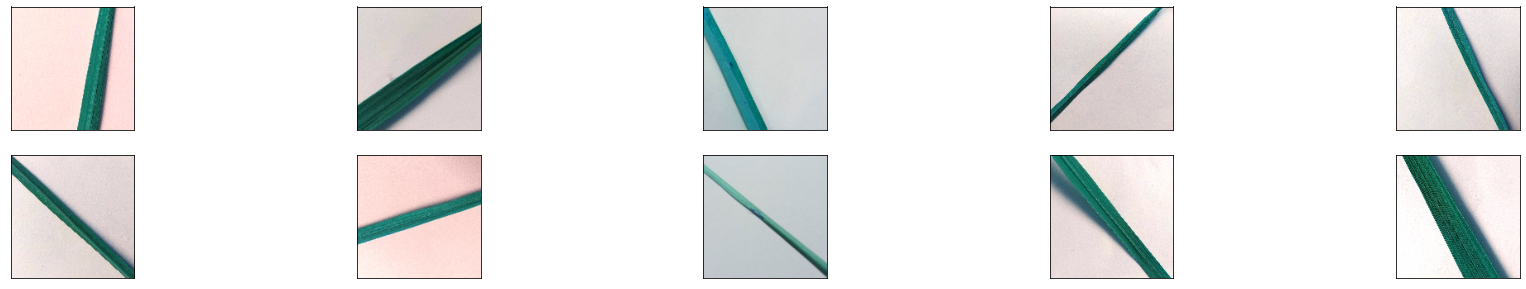

In [ ]:
#Let's visualize the first 10 training images!
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(
    rotation_range=30, width_shift_range=0.15,
    height_shift_range=0.15, shear_range=0.15, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")
aug1=ImageDataGenerator(
    rotation_range=30, width_shift_range=0.15,
    height_shift_range=0.15, shear_range=0.15,
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


--2020-06-13 09:58:24--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  94.4MB/s    in 0.9s    

2020-06-13 09:58:25 (94.4 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

last layer output shape:  (None, 7, 7, 768)


In [ ]:


# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (4, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [ ]:

from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
#batch_size = 32

checkpoint = ModelCheckpoint(filepath = 'cnn.hdf5',monitor='val_accuracy' ,verbose = 1, save_best_only = True)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,mode='auto')
#checkpointer = ModelCheckpoint('cnn.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')
history = model.fit_generator(
        aug.flow(X_train,Y_train,batch_size=32),
        #steps_per_epoch=80,
        epochs=50,
        validation_data=aug1.flow(x_val, y_val,batch_size=32),
        #validation_steps=50,
        callbacks=[checkpoint,reduce_lr],
        verbose=2, shuffle=True
        )

Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.65620, saving model to cnn.hdf5
68/68 - 16s - loss: 0.6826 - accuracy: 0.7162 - val_loss: 0.9283 - val_accuracy: 0.6562 - lr: 0.0010
Epoch 2/50

Epoch 00002: val_accuracy did not improve from 0.65620
68/68 - 13s - loss: 0.6524 - accuracy: 0.7218 - val_loss: 0.9628 - val_accuracy: 0.6430 - lr: 0.0010
Epoch 3/50

Epoch 00003: val_accuracy did not improve from 0.65620
68/68 - 13s - loss: 0.6835 - accuracy: 0.7144 - val_loss: 1.1126 - val_accuracy: 0.6198 - lr: 0.0010
Epoch 4/50

Epoch 00004: val_accuracy did not improve from 0.65620
68/68 - 13s - loss: 0.6685 - accuracy: 0.7293 - val_loss: 1.0043 - val_accuracy: 0.6397 - lr: 1.0000e-04
Epoch 5/50

Epoch 00005: val_accuracy did not improve from 0.65620
68/68 - 13s - loss: 0.6264 - accuracy: 0.7372 - val_loss: 0.9862 - val_accuracy: 0.6397 - lr: 1.0000e-04
Epoch 6/50

Epoch 00006: val_accuracy did not improve from 0.65620
68/68 - 13s - loss: 0.6131 - accuracy: 0.7498 - val_loss: 

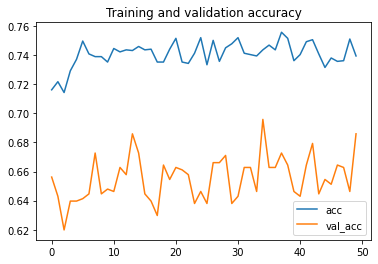

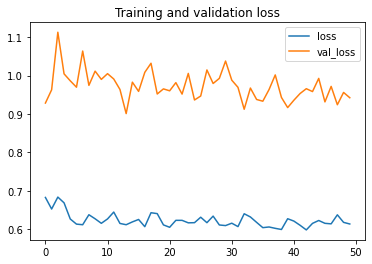

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(['acc', 'val_acc'], loc='lower right')  
plt.title('Training and validation accuracy')


plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['loss', 'val_loss'], loc='upper right')  
plt.title('Training and validation loss')

plt.show()

In [ ]:
model.load_weights('cnn.hdf5')

In [ ]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test,batch_size=32,verbose=0)
print('\n', 'Test Loss','Test accuracy:', score[0],score[1])
#accuracy !!


 Test Loss Test accuracy: 1.0485236644744873 0.6551154851913452


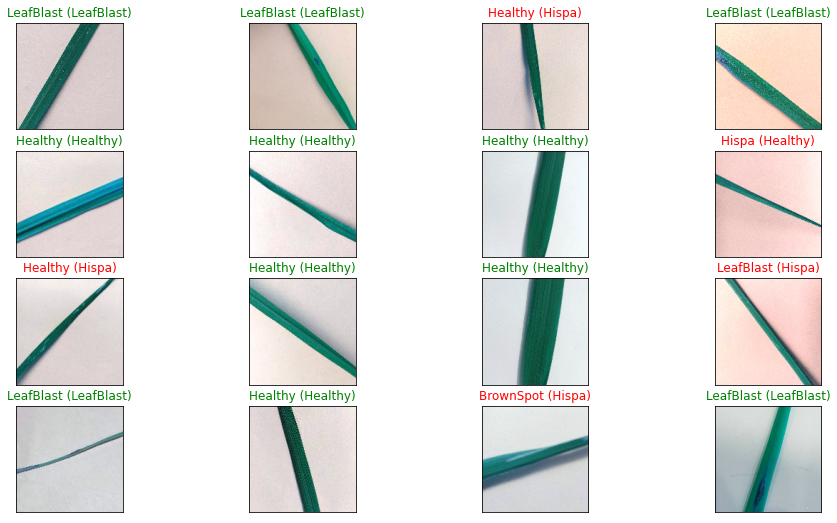

In [ ]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [ ]:
#y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1).astype(int)
# converting both the values to int will help us to compare easily
y_true = np.argmax(y_test,axis = 1).astype(int)
corr=[]
incorr=[]
corr_count=0
incorr_count=0

for i in range(len(y_test)):
   # checking for correct predictions
    if(y_pred[i]==y_true[i]):
        corr.append(i)
        corr_count+=1
    else:
        incorr.append(i)
        incorr_count+=1
        
print("%d Images are identified correctly" %(corr_count))
print("%d Images are identified incorrectly" %(incorr_count))

397 Images are identified correctly
209 Images are identified incorrectly


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


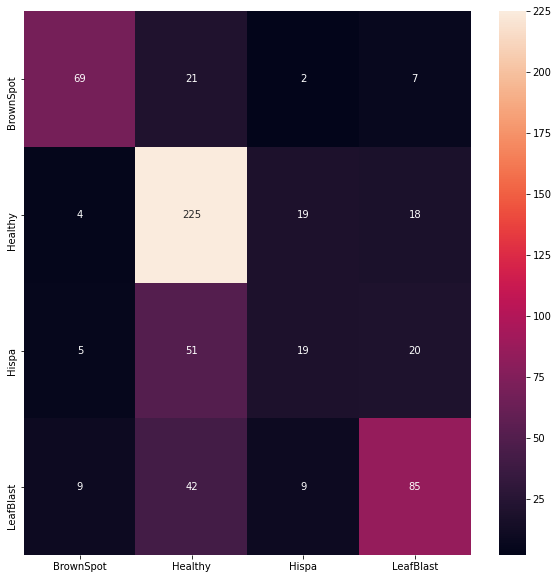

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd 
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
#fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(np.unique(target_labels))
ax.set_yticklabels(np.unique(target_labels))
plt.show()

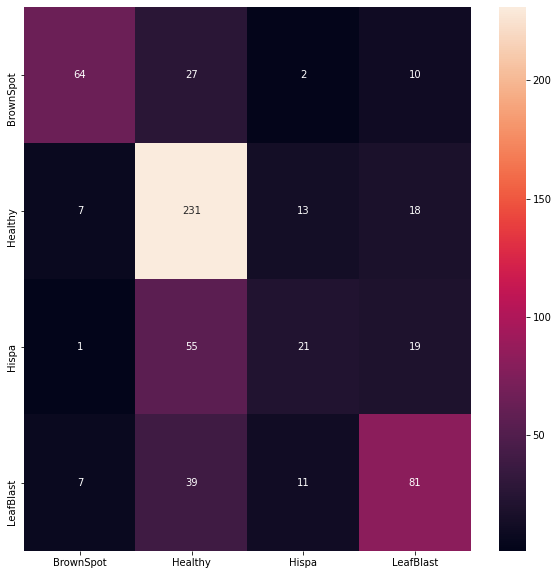

In [ ]:
#confusion matrix
y_pred2=model.predict(x_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(y_test,axis=1)
#compute conf mat
conf_mat2=confusion_matrix(y_true2,y_pred_classes2)
#plot the con mat
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
ax.set_xticklabels(np.unique(target_labels))
ax.set_yticklabels(np.unique(target_labels))
plt.show()

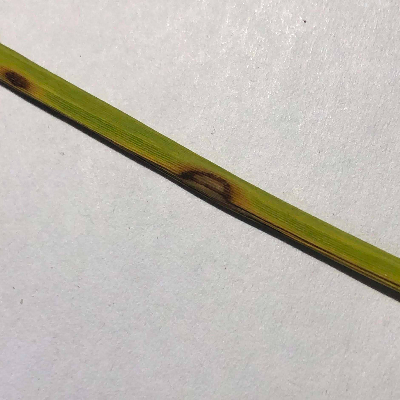

predicted disease: LeafBlast


In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

path="/content/IMG_3104.jpg"
default_image_size=tuple((150,150))
def convert_image_to_array(file):
  images_as_array=[]
  image=cv2.imread(file)
  image=cv2.resize(image, default_image_size) 
  images_as_array.append(img_to_array(image))
  return images_as_array

x= np.array(convert_image_to_array(path))

#x=np.expand_dims(x, axis=0)
x= x.astype('float32')/255
classes = model.predict(x)
pred_id = np.argmax(classes)
#print(pred_id)
img=cv2.imread("/content/IMG_3104.jpg")
img=cv2.resize(img,(400,400))
cv2_imshow(img)
print("predicted disease: "+target_labels[pred_id])

original:


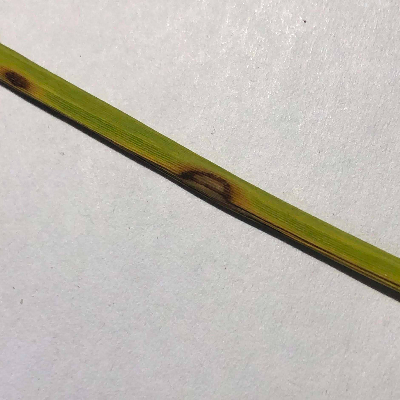

only leaf:


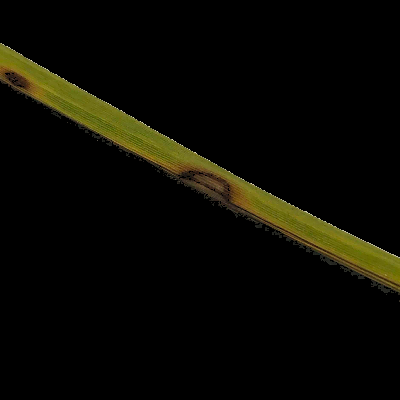

infected area:


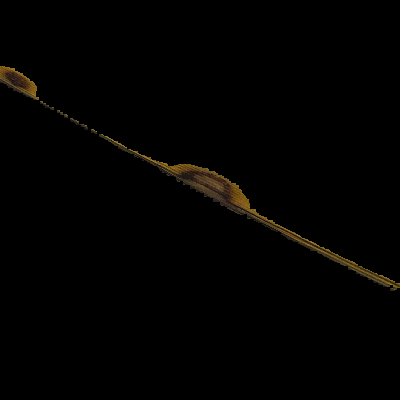

area of leaf: 14847.5
area of infected region: 4025.0
percent of infected area:27.10894089914127


In [ ]:
font = cv2.FONT_HERSHEY_COMPLEX
#code for leaf area
img7=cv2.imread("/content/IMG_3104.jpg")
img7=cv2.resize(img7,(400,400))
print("original:")
cv2_imshow(img7)
img1=cv2.imread("/content/IMG_3104.jpg")
img1=cv2.resize(img1,(400,400))
img5=cv2.imread("/content/IMG_3104.jpg")
img5=cv2.resize(img5,(400,400))
img4=cv2.imread("/content/IMG_3104.jpg")
img4=cv2.resize(img4,(400,400))
img6=cv2.imread("/content/IMG_3104.jpg")
img6=cv2.resize(img6,(400,400))
hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
# find the green color
mask_green = cv2.inRange(hsv, (36,30,0), (86,255,255))
# find the brown color
mask_brown = cv2.inRange(hsv, (8, 60, 20), (100, 255, 255))
# find the yellow color in the leaf
mask_yellow = cv2.inRange(hsv, (21, 39, 64), (40, 255, 255))
#mask_black=cv2.inRange(hsv,(0,0,0),(100,100,0))

# find any of the three colors(green or brown or yellow) in the image
mask = cv2.bitwise_or(mask_green, mask_brown)
mask = cv2.bitwise_or(mask, mask_yellow)
#mask=cv2.bitwise_or(mask,mask_black)
# Bitwise-AND mask and original image
res = cv2.bitwise_and(img1,img1, mask= mask)
res2 = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
contours = cv2.findContours(res2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[-2]
#print(len(contours))
c_area1=0
#co=0
for cnt in contours:
    area=cv2.contourArea(cnt)
    if(area>150):
        #co=co+1
        c_area1=cv2.contourArea(cnt)
        #print(c_area1)
        approx = cv2.approxPolyDP(cnt, 0.0009 * cv2.arcLength(cnt, True), True)
        cv2.drawContours(img5, [approx], 0, (0, 0, 255), 2)
print("only leaf:")
cv2_imshow(res)
#print(co)
#end of leaf
#code for affected area
img_frame = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(img4,cv2.COLOR_BGR2HSV)
l_b = np.array([10, 100, 20])
u_b = np.array([20, 255, 255])
mask = cv2.inRange(hsv, l_b, u_b)
mask = cv2.dilate(mask, None, iterations=2)
mask = cv2.erode(mask, None, iterations=1)
res3 = cv2.bitwise_and(img4, img4, mask=mask)
res4 = cv2.cvtColor(res3,cv2.COLOR_BGR2GRAY)
print("infected area:")
cv2_imshow(res3)
contours = cv2.findContours(res4, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[-2]
#print(len(contours))
c_area=0
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.0009 * cv2.arcLength(cnt, True), True)
    cv2.drawContours(img6, [approx], 0, (0, 0, 255), 1)
    #print(cv2.contourArea(cnt))
    c_area=c_area+cv2.contourArea(cnt)
#print(c_area)  #contour area in pixels later convert into mm

percent=(c_area/c_area1)*100
print("area of leaf: "+str(c_area1))
print("area of infected region: "+str(c_area))
print("percent of infected area:"+str(percent))

cv2.waitKey(0)
cv2.destroyAllWindows()